## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### 1. Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

In [4]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.53307257, 0.22008349, 0.59624528],
       [0.97230948, 0.36357446, 0.94834002],
       [0.40216768, 0.47598331, 0.40752173],
       [0.477061  , 0.92263769, 0.79310944],
       [0.36726375, 0.23029809, 0.16415434]])

In [5]:
print(f"Размеры: {a.shape}")

Размеры: (5, 3)


In [6]:
print(f"Добавили 5:\n{a + 5}")

Добавили 5:
[[5.53307257 5.22008349 5.59624528]
 [5.97230948 5.36357446 5.94834002]
 [5.40216768 5.47598331 5.40752173]
 [5.477061   5.92263769 5.79310944]
 [5.36726375 5.23029809 5.16415434]]


In [7]:
print(f"Посчитали произведение X X^T:\n{a @ a.T}")

Посчитали произведение X X^T:
[[0.68811154 1.16377151 0.56212353 0.93025321 0.34433929]
 [1.16377151 1.97692091 0.95055599 1.55143585 0.59649866]
 [0.56212353 0.95055599 0.55437292 0.95422799 0.32421612]
 [0.93025321 1.55143585 0.95422799 1.70787008 0.51788127]
 [0.34433929 0.59649866 0.32421612 0.51788127 0.21486652]]


In [8]:
print(f"Среднее по колонкам:\n{a.mean(axis=-1)}")

Среднее по колонкам:
[0.44980045 0.76140799 0.42855757 0.73093604 0.25390539]


In [7]:
print(f"Изменили размеры: {a.reshape(3, 5).shape}")

Изменили размеры: (3, 5)


Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [13]:
x = torch.rand(5, 3)
x

tensor([[0.1658, 0.5855, 0.2481],
        [0.1755, 0.9671, 0.9999],
        [0.3581, 0.9901, 0.3426],
        [0.4451, 0.6263, 0.9402],
        [0.2369, 0.2496, 0.2276]])

In [14]:
print(f"Размеры: {x.shape}")

Размеры: torch.Size([5, 3])


In [15]:
print(f"Добавили 5:\n{x + 5}")

Добавили 5:
tensor([[5.1658, 5.5855, 5.2481],
        [5.1755, 5.9671, 5.9999],
        [5.3581, 5.9901, 5.3426],
        [5.4451, 5.6263, 5.9402],
        [5.2369, 5.2496, 5.2276]])


In [16]:
# для перемножения тензоров высокой размерности читайте документацию по различным вариантам:
# torch.mm, torch.matmul, torch.bmm, @
print(f"X X^T  (1):\n{torch.matmul(x, x.transpose(1, 0))}\n")
print(f"X X^T  (2):\n{x.mm(x.t())}")

X X^T  (1):
tensor([[0.4319, 0.8434, 0.7241, 0.6738, 0.2419],
        [0.8434, 1.9658, 1.3629, 1.6239, 0.5106],
        [0.7241, 1.3629, 1.2259, 1.1016, 0.4100],
        [0.6738, 1.6239, 1.1016, 1.4743, 0.4758],
        [0.2419, 0.5106, 0.4100, 0.4758, 0.1703]])

X X^T  (2):
tensor([[0.4319, 0.8434, 0.7241, 0.6738, 0.2419],
        [0.8434, 1.9658, 1.3629, 1.6239, 0.5106],
        [0.7241, 1.3629, 1.2259, 1.1016, 0.4100],
        [0.6738, 1.6239, 1.1016, 1.4743, 0.4758],
        [0.2419, 0.5106, 0.4100, 0.4758, 0.1703]])


In [17]:
print(f"Среднее по колонкам:\n{x.mean(dim=-1)}")

Среднее по колонкам:
tensor([0.3332, 0.7141, 0.5636, 0.6705, 0.2381])


In [18]:
print(f"Изменили размеры:\n{x.view([3, 5]).shape}\n")

# будьте внимательны и не используйте view для транспонирования осей
print(f"По-другому изменили размеры:\n{x.view_as(x.t()).shape}\n")
print(f"Но не транспонировали!\n{x.view_as(x.t()) == x.t()}")

Изменили размеры:
torch.Size([3, 5])

По-другому изменили размеры:
torch.Size([3, 5])

Но не транспонировали!
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])


Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


### 2. Создаем тензоры в pytorch и снова изучаем базовые операции

In [19]:
x = torch.empty(5, 3)  # пустой тензор
print(x)

tensor([[8.4490e-39, 1.0469e-38, 9.3674e-39],
        [9.9184e-39, 8.7245e-39, 9.2755e-39],
        [8.9082e-39, 9.9184e-39, 8.4490e-39],
        [9.6429e-39, 1.0653e-38, 1.0469e-38],
        [4.2246e-39, 1.0378e-38, 9.6429e-39]])


In [20]:
x = torch.rand(5, 3)  # случайный тензор
print(x)

tensor([[0.7522, 0.6318, 0.2445],
        [0.8368, 0.1327, 0.0950],
        [0.6160, 0.4403, 0.3273],
        [0.0883, 0.4375, 0.7807],
        [0.4557, 0.0413, 0.0905]])


In [21]:
x = torch.zeros(5, 3, dtype=torch.float32)  # тензор с нулями и указанием типов чисел
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [22]:
x = torch.tensor([5.5, 3])  # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [23]:
x1 = x.new_ones(5, 3, dtype=torch.double)  # используем уже созданный тензор для создания тензора из единичек
print(x, x.size()) 

tensor([5.5000, 3.0000]) torch.Size([2])


In [24]:
x = torch.randn_like(x1, dtype=torch.float)  # создаем случайный тензор с размерами x
print(x, x.size())

tensor([[ 1.2132, -1.0754, -0.1516],
        [ 0.8220, -0.2753,  1.2630],
        [ 1.6723, -0.7810, -1.9560],
        [ 0.8158,  0.7183,  0.3940],
        [ 0.3526,  0.8630, -0.3265]]) torch.Size([5, 3])


In [25]:
y = torch.rand(5, 3)
print(x + y)  # операция сложения

tensor([[ 1.3228, -0.8506,  0.5634],
        [ 1.4564, -0.1966,  2.0797],
        [ 2.4746, -0.1043, -1.4831],
        [ 1.4923,  0.9091,  1.1353],
        [ 0.7055,  1.7096,  0.4492]])


In [26]:
z = torch.add(x, y)  # очередная операция сложения
print(z)

tensor([[ 1.3228, -0.8506,  0.5634],
        [ 1.4564, -0.1966,  2.0797],
        [ 2.4746, -0.1043, -1.4831],
        [ 1.4923,  0.9091,  1.1353],
        [ 0.7055,  1.7096,  0.4492]])


In [27]:
torch.add(x, y, out=z)  # и наконец последний вид
print(z)

tensor([[ 1.3228, -0.8506,  0.5634],
        [ 1.4564, -0.1966,  2.0797],
        [ 2.4746, -0.1043, -1.4831],
        [ 1.4923,  0.9091,  1.1353],
        [ 0.7055,  1.7096,  0.4492]])


In [28]:
print(x * y)  # поэлементное умножение

tensor([[ 0.1330, -0.2417, -0.1084],
        [ 0.5215, -0.0217,  1.0314],
        [ 1.3417, -0.5286, -0.9250],
        [ 0.5519,  0.1370,  0.2921],
        [ 0.1244,  0.7306, -0.2533]])


In [29]:
print(x @ y.t())  # матричное умножение

tensor([[-2.1699e-01,  5.6127e-01,  1.7391e-01,  5.0321e-01, -5.9992e-01],
        [ 9.3133e-01,  1.5313e+00,  1.0704e+00,  1.4398e+00,  1.0367e+00],
        [-1.3907e+00, -5.9787e-01, -1.1189e-01, -4.6770e-01, -1.5884e+00],
        [ 5.3263e-01,  8.9593e-01,  1.3270e+00,  9.8104e-01,  1.2017e+00],
        [-8.6280e-04,  2.4983e-02,  7.1248e-01,  1.6111e-01,  6.0176e-01]])


In [30]:
print(x.mm(y.t()))  # и опять матричное умножение

tensor([[-2.1699e-01,  5.6127e-01,  1.7391e-01,  5.0321e-01, -5.9992e-01],
        [ 9.3133e-01,  1.5313e+00,  1.0704e+00,  1.4398e+00,  1.0367e+00],
        [-1.3907e+00, -5.9787e-01, -1.1189e-01, -4.6770e-01, -1.5884e+00],
        [ 5.3263e-01,  8.9593e-01,  1.3270e+00,  9.8104e-01,  1.2017e+00],
        [-8.6280e-04,  2.4983e-02,  7.1248e-01,  1.6111e-01,  6.0176e-01]])


In [31]:
print(x.unsqueeze(0).shape)  # добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [32]:
print(x.unsqueeze(0).unsqueeze(1).squeeze().shape)  # убрали измерение в начале

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [33]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### 3. Работаем с градиентами руками

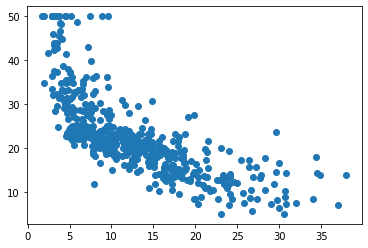

In [34]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

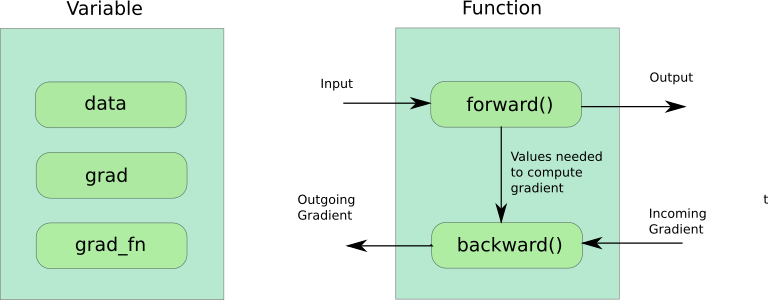

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [62]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [57]:
y_pred = w * x + b                    # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y) ** 2)  # совершаем операции с тензорами
loss.backward()                       # считаем градиенты

In [58]:
# сделали операции и посчитали градиенты, значение должно было появится
assert w.grad is not None
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-12.1931])
dL/db = 
 tensor([-44.3729])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [41]:
w.data

tensor([0.4612])

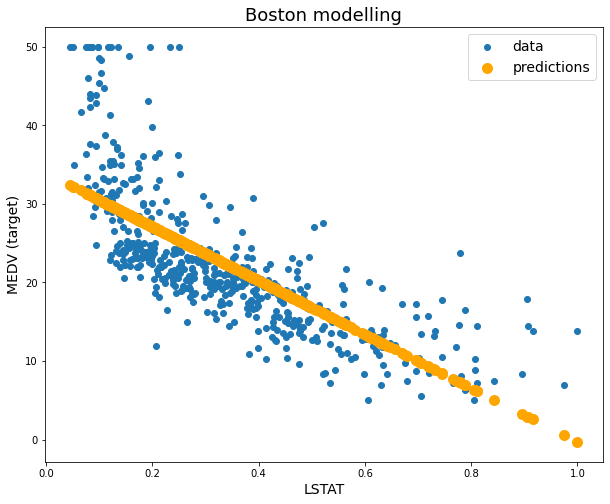

loss =  38.60103


In [65]:
from IPython.display import clear_output

for i in range(400):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -=  0.05 * w.grad# YOUR CODE
    b.data -=  0.05 * b.grad# YOUR CODE

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.01:
            print("Done!")
            break


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [37]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [38]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [39]:
our_dataset = RandomDataset(x, y)

In [40]:
our_dataset.__getitem__(1)

{'sample': tensor([0.7447, 0.7060, 0.7835, 0.9348, 0.7714]),
 'target': 0.6070174255738682}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [41]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [42]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.4252, 0.4916, 0.5829, 0.3299, 0.0676],
        [0.7447, 0.7060, 0.7835, 0.9348, 0.7714],
        [0.2173, 0.3193, 0.8351, 0.8803, 0.9282],
        [0.3458, 0.9345, 0.5077, 0.0606, 0.7029]])
Target:
tensor([0.6321, 0.6070, 0.9880, 0.1984], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [43]:
model = nn.Sequential()                   # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 10))  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())         # добавили функцию активации
model.add_module("l3", nn.Linear(10, 1))  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [44]:
y_pred = model(batch['sample']) # получили предсказания модели

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [45]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", 
    train=True, 
    download=True, 
    transform=torchvision.transforms.ToTensor()
) 
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
) 

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
)

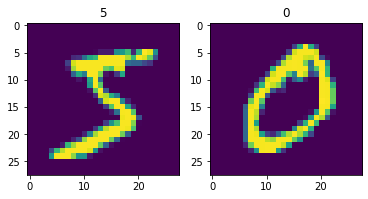

In [46]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [47]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 

Веса моделей хранятся в виде матриц и выглядят так:

In [48]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[ 0.0007,  0.0229, -0.0022,  ..., -0.0266,  0.0115,  0.0053],
          [-0.0255,  0.0302,  0.0199,  ...,  0.0119,  0.0093, -0.0115],
          [-0.0302,  0.0302, -0.0085,  ..., -0.0218,  0.0246,  0.0350],
          ...,
          [-0.0168, -0.0170,  0.0248,  ..., -0.0022,  0.0122,  0.0088],
          [ 0.0112,  0.0137, -0.0151,  ...,  0.0072,  0.0083, -0.0178],
          [-0.0059,  0.0312, -0.0187,  ..., -0.0050, -0.0188, -0.0209]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0303,  0.0165,  0.0224, -0.0242,  0.0256, -0.0271, -0.0262,  0.0081,
          -0.0021, -0.0324,  0.0343, -0.0007,  0.0356, -0.0043,  0.0141,  0.0137,
          -0.0298, -0.0062, -0.0210,  0.0235, -0.0239,  0.0013, -0.0346,  0.0138,
           0.0111,  0.0246, -0.0128, -0.0163, -0.0094, -0.0117, -0.0350, -0.0228,
           0.0208,  0.0326,  0.0200, -0.0269,  0.0289, -0.0266, -0.0135,  0.0280,
          -0.0291,  0.0168, -0.0226, 

_Красиво_ трекать метрики в полуавтоматическом режиме мы будем в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся(это того стоит):

In [ ]:
# !pip install wandb --upgrade --quiet
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [50]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
          
        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log({"mean val loss": np.mean(val_loss),
                   "mean val accuracy": np.mean(val_accuracy)})
        
        # печатаем метрики
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.11368751525878906, accuracy: 0.9649


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08628030866384506, accuracy: 0.9746


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08445032685995102, accuracy: 0.9763


### Дополнительные материалы:

* [PyTroch на простейшем примере с пояснениями](https://github.com/Kaixhin/grokking-pytorch)
* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)